In [230]:
import requests as req
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [231]:
path = '/mnt/c/Fin'
#filenames = glob.glob(path + '/*.csv')
card_filenames = glob.glob(path + '/Chase8795*')


li = []
for filename in card_filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)


card_df = pd.concat(li, axis=0, ignore_index=True)
card_df['Transaction Date'] = card_df['Transaction Date'].astype('datetime64[ns]')
card_df['Post Date'] = card_df['Post Date'].astype('datetime64[ns]')

card_df.head(12)


,Transaction Date,Post Date,Description,Category,Type,Amount
0,2018-12-29,2018-12-30,Payment Thank You-Mobile,NaN,Payment,1241.05
1,2018-12-19,2018-12-21,CHICAGO O'HARE INTERNA,Home,Sale,-6.00
2,2018-12-19,2018-12-20,ONTARIO CLEANERS,Personal,Sale,-42.65
3,2018-12-18,2018-12-20,JEWEL-OSCO,Groceries,Sale,-103.14
4,2018-12-19,2018-12-20,HUDSON NEWS ST1094,Shopping,Sale,-4.69
5,2018-12-20,2018-12-20,PEETSCOFFEE/MIGHTYLEAF,Food & Drink,Sale,-25.00
6,2018-12-19,2018-12-20,7-ELEVEN 33728,Gas,Sale,-9.19
7,2018-12-18,2018-12-19,7-ELEVEN 33728,Gas,Sale,-11.30
8,2018-12-19,2018-12-19,HAIR CUTTERY #3451,Personal,Sale,-23.00
9,2018-12-16,2018-12-18,7-ELEVEN 33728,Gas,Sale,-18.09


In [232]:
#card_df.groupby(['Type','Category']).sum().sort_values(by='Amount',ascending=True).head(30)

card_df = card_df[card_df['Type'] == 'Sale']

card_df.groupby(['Transaction Date','Category', 'Description']).sum().sort_values(by='Amount',ascending=True).head(30)

card_df.groupby(['Category'])['Amount'].agg(['sum', 'count']).sort_values(by='count',ascending=True).head(30)


#card_df[card_df['Type'] == 'Adjustment'].head(19)

,sum,count
Category,,
Professional Services,-166.00,1
Home,-786.77,3
Miscellaneous,-472.44,4
Automotive,-1248.88,6
Entertainment,-1102.40,16
Bills & Utilities,-1883.12,35
Health & Wellness,-1152.46,45
Personal,-2033.36,58
Groceries,-2350.07,79


In [233]:
#plt.style.use('fivethirtyeight')
#sns.set(rc={'figure.figsize':(11, 4)})

#food_df = card_df[card_df['Category'] == 'Food & Drink']

#card_df.set_index('Transaction Date', inplace=True)

date_category_df = card_df.groupby(['Transaction Date','Category']).sum()

date_category_df = date_category_df.pivot_table(index = 'Transaction Date',columns='Category',values='Amount')

month_category_df = date_category_df.groupby(pd.Grouper(freq='M')).sum()

month_category_df.head()


#date_category_df.head()
#food_df.plot(x ='Transaction Date', y='Amount')

Category,Automotive,Bills & Utilities,Entertainment,Food & Drink,Gas,Groceries,Health & Wellness,Home,Miscellaneous,Personal,Professional Services,Shopping,Travel
Transaction Date,,,,,,,,,,,,,
2018-04-30,0.0,-49.95,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
2018-05-31,0.0,-216.44,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,-183.16,0.00
2018-06-30,0.0,-216.44,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,-209.00,0.00
2018-07-31,0.0,0.00,0.0,-794.99,-10.88,-28.54,-20.39,0.0,0.0,-497.83,0.0,-148.14,-770.04
2018-08-31,0.0,-61.18,0.0,-638.41,-52.96,-114.11,0.00,0.0,0.0,-46.90,0.0,-465.92,-437.14


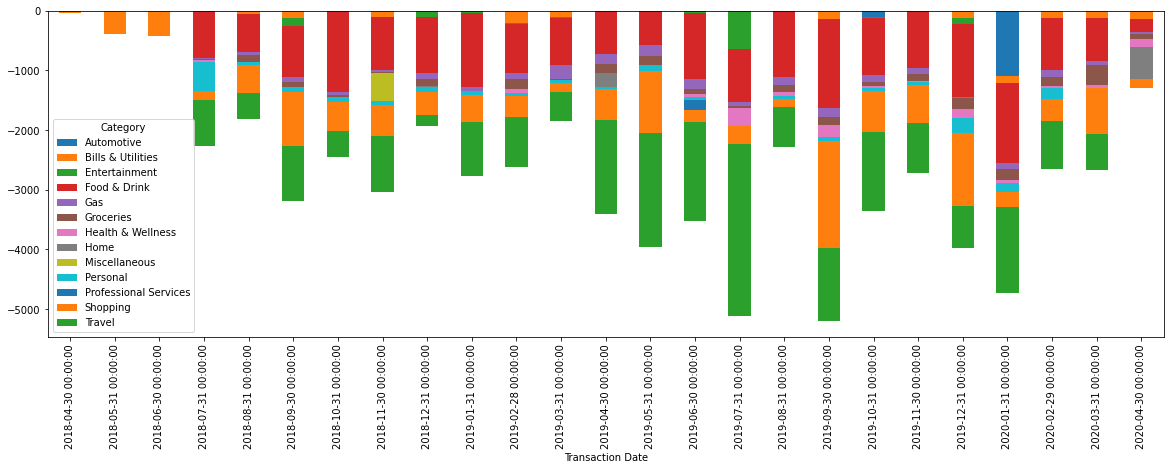

In [234]:

month_category_df.plot(figsize=(20,6), kind='bar', stacked=True)

In [235]:
def freq_purchases(df):    
    #df = df.groupby(['Category', 'Description'])['Amount'].count().sort_values(ascending=False)#.sort_values(by='Amount',ascending=True)
    df = df.groupby(['Category', 'Description'])['Amount'].agg(['sum', 'count']).sort_values(ascending=False, by='sum')#.sort_values(by='Amount',ascending=True)
    return df

freq_purchases(card_df)

sum  count
Category Description                           
Shopping Amazon.com*MW5IE3NZ1      -0.12      1
         Amazon.com*6J1X35N93      -0.12      1
         Amazon.com*PZ1EP3SZ3      -0.15      1
         Amazon.com*MA7O44271      -0.20      1
         Amazon.com*MA3CS7NB2      -0.34      1
...                                  ...    ...
         Bonobos  New York      -1151.12      9
Travel   HERTZ RENT-A-CAR       -1195.75      4
Shopping APL*APPLE ONLINE STORE -1364.25      2
Travel   SPRINGHILL SUITES BUCK -1456.19     20
         HAMPTON INNS           -8569.44     26

[826 rows x 2 columns]

In [236]:
card_df[card_df['Description'].str.contains('[*]')].sort_values(by='Amount', ascending=False).head(60)

card_df[card_df['Description'].str.contains('UBER|LYFT')].sort_values(by='Amount').head(20)

,Transaction Date,Post Date,Description,Category,Type,Amount
1602,2019-07-27,2019-07-28,BC *UBER CASH,Travel,Sale,-95.00
1135,2019-12-14,2019-12-15,BC *UBER CASH,Travel,Sale,-95.00
2017,2020-01-03,2020-01-05,BC *UBER CASH,Travel,Sale,-95.00
679,2019-05-18,2019-05-19,BC *UBER CASH,Travel,Sale,-95.00
656,2019-05-30,2019-05-31,BC *UBER CASH,Travel,Sale,-95.00
1164,2019-12-07,2019-12-08,BC *UBER CASH,Travel,Sale,-95.00
1564,2019-08-14,2019-08-14,BC *UBER CASH,Travel,Sale,-95.00
1491,2019-09-05,2019-09-06,LYFT *RIDE THU 4PM,Travel,Sale,-55.61
613,2019-06-18,2019-06-19,UBER TECHNOLOGIES INC,Travel,Sale,-54.72
1776,2020-03-12,2020-03-13,LYFT *RIDE THU 3PM,Travel,Sale,-50.48


In [255]:
def description_group(desc):
    updated_desc = desc
    if 'UBER' in updated_desc and 'EATS' not in updated_desc:
        updated_desc = 'UBER'
    if 'TAXI' in updated_desc or 'ROMULUS OLARIU' in updated_desc or 'AJASA TRANSPORT' in updated_desc:
        updated_desc = 'TAXI'
    if '*' in updated_desc:
        i = updated_desc.find('*')
        if 'Amazon.com' in updated_desc or 'LYFT' in updated_desc or 'AMZN' in updated_desc:
            updated_desc = updated_desc[0:i]
        else:
            updated_desc = updated_desc[i + 1:]
    if 'UNITED' in updated_desc or 'AMERICAN AIR' in updated_desc or 'SOUTHWES' in updated_desc or 'DELTA AIR' in updated_desc:
        ls = updated_desc.split(" ")
        updated_desc = ls[0]
    return updated_desc


def assign_subcategory(row):
    category = row['Category']
    desc = row['Description Group']
    subcategory = 'Other'
    subcategory_dic = {
        # Food
        'Coffee':['STARBUCK', 'COFFEE', 'PEETS'],
        'Chipotle / Qdoba':['CHIPOT', 'QDOBA'],

        # Travel
        'Rideshare/Taxi':['UBER', 'TAXI', 'LYFT'],
        'Flight':['UNITED', 'AMERICAN', 'SOUTHWES', 'DELTA AIR'],
        'Hotel':['HAMPTON', 'SPRINGHILL', 'PARK CENTRAL SAN FRANCIS', 'HOTEL'],
        'Public Transport':['METRO', 'Marta'],

        #Shopping
        'Amazon':['AMAZON','Amazon.com', 'AMZN'],
        'Electronics':['APPLE', 'BESTBUY'],
        'Clothes':['Bonobos', 'BANANA', 'LULULEMON', 'BANANAREPUBLIC', 'UNIQLO', 'UNDER ARMOUR', 'CH-PLEASPRAIRIE', 'COLE HAAN', 'NORDSTROM', 
                    'MACYS', 'H&amp', 'REI', 'J. CREW', 'COACH', 'POLO', 'MARSHALLS', 'APOGEE', 'BR FACTORY'],
        'Airport':['HUDSON', 'BESTBUY', 'PARADIES'],
        'Online Services':['LEETCODE', 'CODERPAD', 'GROKKINGT']

    }
    for sub in subcategory_dic:
        for description in subcategory_dic[sub]:
            if description in desc:
                subcategory = sub
    return subcategory

def category_subcategory(row):
    return row['Category'] + ' - ' + row['Subcategory']


#description_group('Amazon.com*MW5IE3NZ1')
#description_group('PP*FOODA INC')

card_df['Description Group'] = card_df['Description'].apply(description_group)
#card_df['Subcategory'] = card_df['Description Group'].apply(subcategory)
card_df['Subcategory'] = card_df.apply(assign_subcategory, axis=1)

travel_df = card_df[card_df['Category'] == 'Travel']

travel_df.groupby(['Category', 'Subcategory', 'Description Group'])['Amount'].agg(['count','sum']).sort_values(by='sum', ascending=True).head(40)

food_df = card_df[card_df['Category'] == 'Food & Drink']
food_df.groupby(['Category', 'Subcategory', 'Description Group'])['Amount'].agg(['count','sum']).sort_values(by='sum', ascending=True).head(80)



shopping_df = card_df[card_df['Category'] == 'Shopping']
shopping_df.groupby(['Category', 'Subcategory', 'Description Group'])['Amount'].agg(['count', 'sum']).sort_values(by='sum', ascending=True).head(50)

card_df['Category Subcategory'] = card_df.apply(category_subcategory, axis = 1)

card_df.groupby('Category Subcategory')['Amount'].agg(['count', 'sum']).sort_values(by='sum', ascending=True).head(50)

#card_df.head()

#food_df[food_df['Description Group'] == 'EATS'].head(15)

#travel_df[travel_df['Description Group'] == 'ROMULUS OLARIU'].head(16)

,count,sum
Category Subcategory,,
Food & Drink - Other,683,-16033.22
Travel - Hotel,48,-11152.82
Shopping - Clothes,47,-4828.27
Travel - Rideshare/Taxi,137,-3854.50
Travel - Flight,19,-3365.55
Shopping - Amazon,132,-3311.43
Travel - Other,46,-3137.68
Food & Drink - Chipotle / Qdoba,230,-3042.63
Groceries - Other,79,-2350.07
